# Gotta lock those centroids down

In [164]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score, plot_confusion_matrix
import matplotlib.cm as cm

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

#Read-in data
X = pd.read_csv('data/X_df.csv')
actual_centroids = pd.read_csv('data/y_df.csv')

from test_scripts.test_class import Test
test = Test()

In [ ]:
#__SOLUTION__
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score, plot_confusion_matrix
import matplotlib.cm as cm

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

#Read-in data
X = pd.read_csv('data/X_df.csv')
actual_centroids = pd.read_csv('data/y_df.csv')

from test_scripts.test_class import Test
test = Test()

### Create an Elbow Curve plot

- For k from 2 to 10:
  - fit a `KMeans` object with `k` clusters and `random_state` 301
  - save the sum of squared distance for all points to the centroids of their respective cluster in a list
    - *Hint*: [read the docs](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
    
    
- Graph the values you saved on the `Y axis` w/ `k` on the `X axis`

In general, what type of information do you diagnose from an Elbow Curve plot?

For this specific graph, what conclusions can you make?

In [ ]:
#Your work here

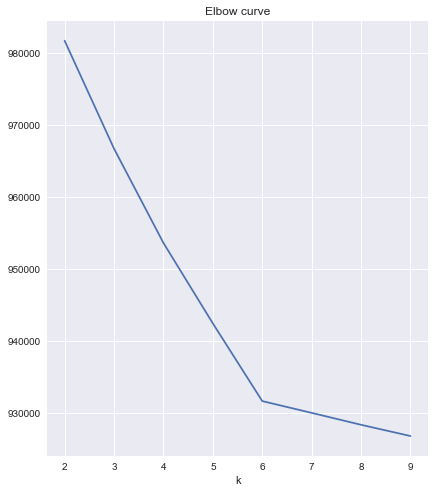

In [162]:
#__SOLUTION__

distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

print('''
    From an Elbow Curve graph we try and find the best
    value for k
    
    From this specific graph, looks like it's 6
''')

### Further diagnosis with silhouette plots

Use the code below to create a silhouette plot for `k` from 2 to 8

What conclusions can you draw?

What implications does this have for interpreting the Elbow Curve graph?

In [ ]:
def silhouette_plot(n_clusters, cluster_labels, X):
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.show()

In [ ]:
#__SOLUTION__

def silhouette_plot(n_clusters, cluster_labels, X):
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.show()

In [ ]:
# Your work here

In [ ]:
#__SOLUTION__

for clus_num in range(2,10):
    kmeans = KMeans(n_clusters=clus_num, random_state = 301)
    kmeans_labels = kmeans.fit_predict(X)
    silhouette_plot(clus_num, kmeans_labels, X)
    
print('''
    6, indeed, seems like the right number of clusters
    
    The avg silhouette coefficient for 6 clusters is 
    highest, meaning on average the points are closer
    to their respective cluster centroids than other 
    cluster centroids
    
    Additionally, the silhouette sample plots of each
    point result in fairly similar distributions across
    each cluster, indicating no one cluster is more
    or less well-defined than any other 
    
    Further, the average silhouette score is fairly low
    (.02 on a scale that goes to 1), indicating a fair 
    amount of overlap among the clusters
    
    Since the Elbow Curve graph was so well-defined for
    6 clusters, this means that the "sharpness" of the 
    kink in the Elbow Curve graph can't be used as a 
    guide for how much overlap is generated by that
    number of clusters 
''')